In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import cv2

In [49]:
def rdwt(img):
    coeffs_org = pywt.swt2(img, 'haar', level=1, axes=(0, 1))

    A1, (B1, C1, D1) = coeffs_org[0]

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0, 0].imshow(A1, cmap='gray'), axs[0, 0].set_title('A1 (LL)')
    axs[0, 1].imshow(B1, cmap='gray'), axs[0, 1].set_title('B1 (LH)')
    axs[1, 0].imshow(C1, cmap='gray'), axs[1, 0].set_title('C1 (HL)')
    axs[1, 1].imshow(D1, cmap='gray'), axs[1, 1].set_title('D1 (HH)')
    
    plt.tight_layout()
    plt.show()

    return A1, B1, C1, D1

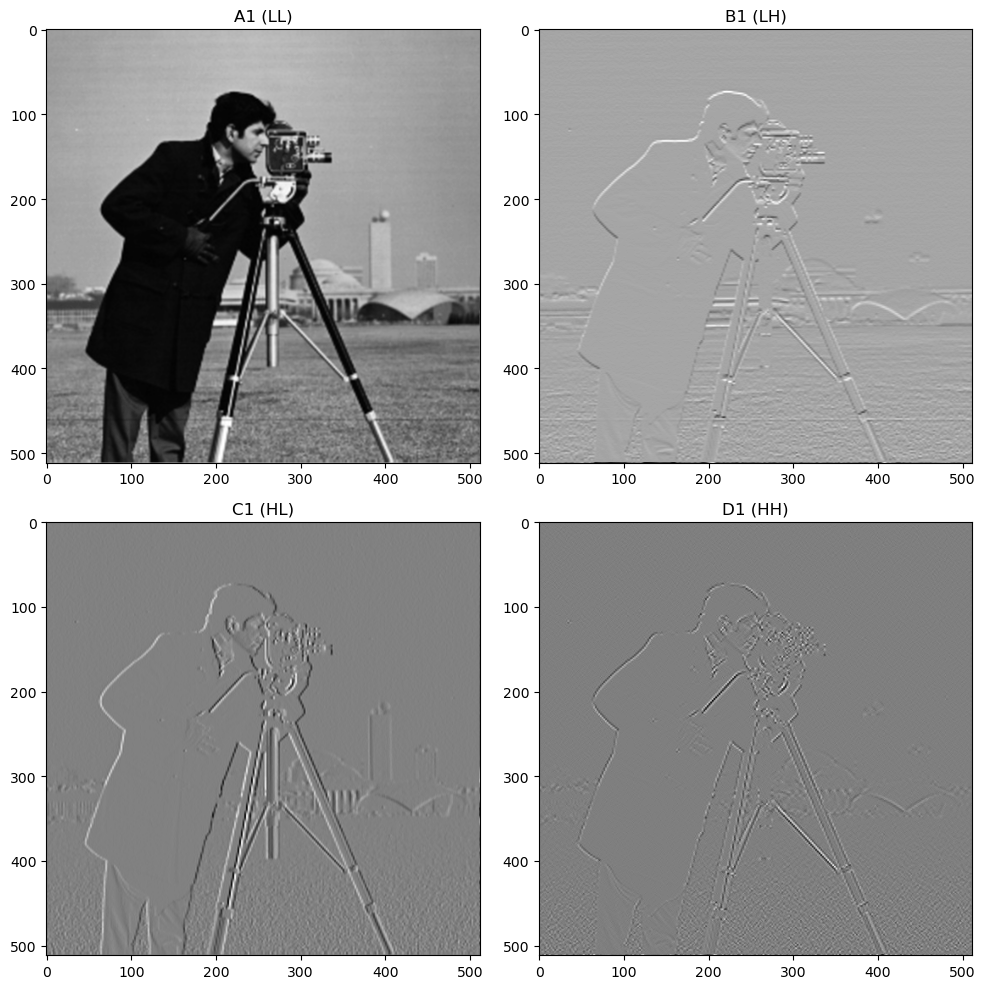

In [50]:
img = cv2.imread('assets/input_image_rdwt.png', 0)

A1, B1, C1, D1 = rdwt(img)

In [51]:
import numpy as np
import pywt

def irdwt(coefficients, wavelet='haar'):
    # Inverse wavelet transform
    irdwt_result = pywt.idwt(coefficients[0], coefficients[1], wavelet, axis=-1)
    return irdwt_result

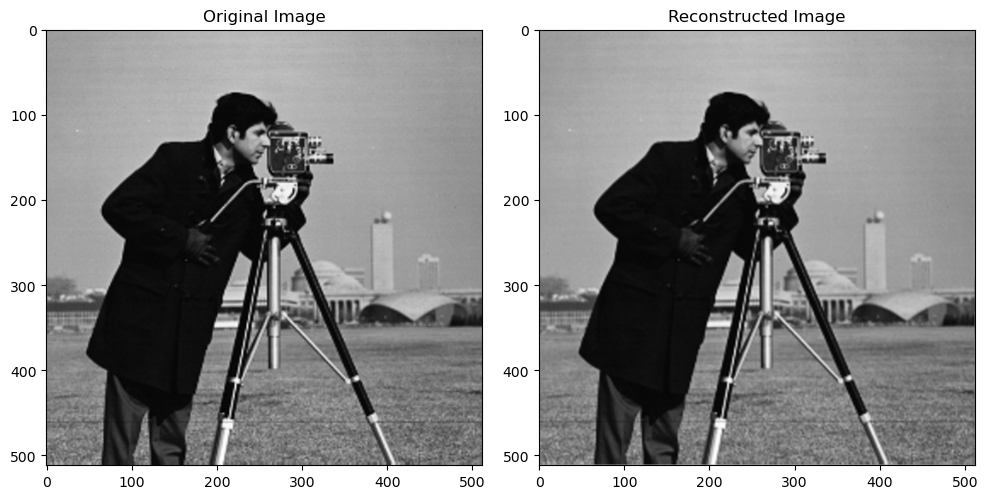

In [52]:
combined_coeffs = [A1, B1, C1, D1]
mark_img = irdwt(combined_coeffs)

mark_img_resized = cv2.resize(mark_img, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)

# Display the original and the resized reconstructed image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(mark_img_resized, cmap='gray')
axs[1].set_title('Reconstructed Image')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

